In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import datasets
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
x = digits.data
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
# image data shape , num of samples = 1797 , number of features (pixel) = 64
x.shape

(1797, 64)

In [8]:
# reshaping image array as 8x8 shape matrix
np.reshape(x[1796], (8,8))

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

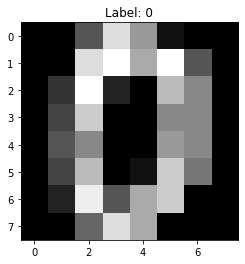

In [9]:
# This is grayscale image
plt.imshow(np.reshape(x[0], (8,8)), cmap = 'gray')
plt.title("Label: %i" %y[0])
plt.show()

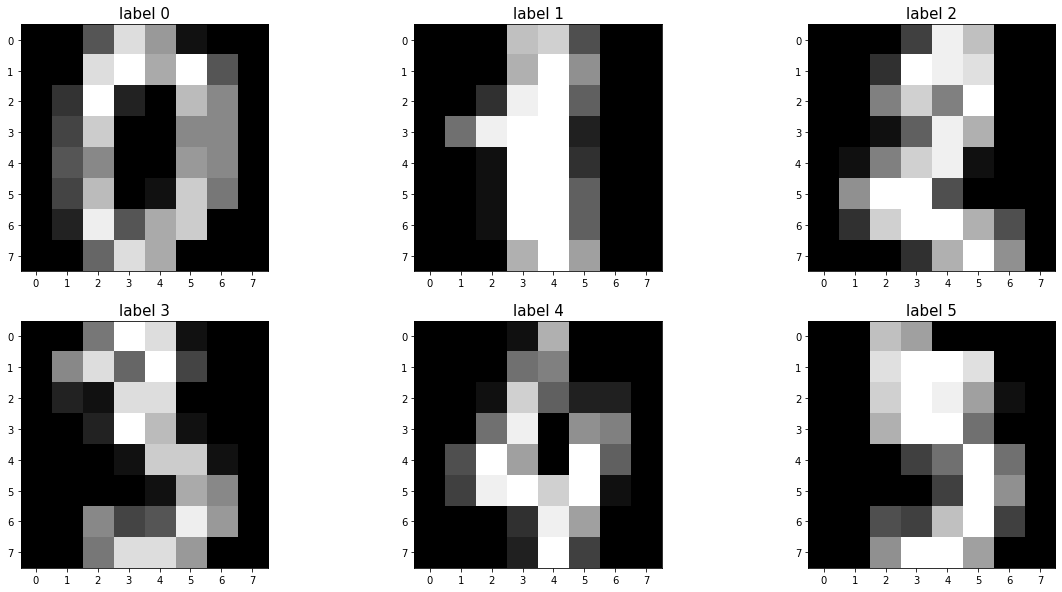

In [10]:
# Subplotting
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(x[0:6], y[0:6])):
    plt.subplot(2, 3, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = 'gray')
    plt.title("label %i" %label, fontsize = 15)
plt.show()

#### PCA

In [11]:
from sklearn.decomposition import PCA
# select the number of components while preserving 95% of the variability in the data
sklearn_pca = PCA(n_components = 0.95)

In [13]:
sklearn_pca.fit(x)

PCA(n_components=0.95)

In [16]:
x_transformed = sklearn_pca.transform(x)

In [17]:
# number of components = 28
print(x_transformed.shape)

(1797, 29)


#### LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [19]:
sklearn_lda = lda()

In [20]:
sklearn_lda.fit(x, y)

LinearDiscriminantAnalysis()

In [21]:
x_transformed = sklearn_lda.transform(x)

In [22]:
x_transformed

array([[ 2.01463220e+00,  5.62348616e+00, -1.86594028e-01, ...,
        -1.09348511e-01, -1.83506669e-01, -9.65495420e-01],
       [-2.20967396e-01, -3.59240033e+00,  2.14901657e+00, ...,
        -1.23115093e-01, -3.39210556e+00,  1.20766919e+00],
       [-2.23485453e+00, -2.70950363e+00,  4.26992781e+00, ...,
         2.51256615e+00,  1.08370006e+00, -4.22490736e-03],
       ...,
       [ 1.04697178e+00, -1.48367733e+00,  3.04170263e+00, ...,
         1.54913444e+00,  1.99315402e+00, -2.17737830e+00],
       [-4.07872916e-01,  1.99167301e+00, -3.65835518e-01, ...,
         9.16595358e-01,  5.26856349e-01,  1.41509141e+00],
       [-1.74145011e-01, -8.87174627e-01,  1.37776831e+00, ...,
        -5.14965352e-02,  3.18833067e+00, -6.91242304e-01]])